In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit # pip install verstack
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### data pre-precess

In [2]:
# Load the training data
train_data = pd.read_csv("data/train_transformed.csv")

In [3]:
train_data.head()

,id,user_verified,user_statuses_count,user_followers_count,user_friends_count,ratio_friends_followers,mention_exist,mention_count,url_exist,url_count,...,tf_idf_0,tf_idf_1,tf_idf_2,tf_idf_3,tf_idf_4,tf_idf_5,tf_idf_6,tf_idf_7,tf_idf_8,tf_idf_9
0,0,0,68460,1101,1226,1.112523,0,0,0,0,...,-1.606137e-15,-1.992248e-13,-6.077335e-13,-1.726278e-12,7.402787e-13,2.375980e-14,2.692723e-13,5.657295e-13,-2.124336e-14,9.444088e-14
1,1,0,309,51,202,3.884615,0,0,0,0,...,1.206801e-02,2.715082e-03,1.318767e-02,3.157979e-02,2.662453e-02,1.621955e-02,-2.204838e-02,9.316040e-03,3.288260e-03,7.966161e-02
2,2,0,3241,1675,2325,1.387232,0,0,0,0,...,5.095493e-02,-1.131896e-03,3.852378e-02,1.163440e-01,1.542300e-01,2.938599e-01,4.018045e-01,1.909630e-01,3.218782e-01,-4.933187e-02
3,3,0,32327,667,304,0.455090,0,0,0,0,...,8.873053e-03,1.403727e-03,3.399734e-03,1.401861e-02,9.761796e-03,9.215406e-03,6.693422e-03,8.483338e-03,-2.502589e-03,1.261141e-02
4,4,0,581,42,127,2.953488,0,0,0,0,...,2.774364e-02,-1.756079e-03,8.245230e-03,3.155745e-02,1.385880e-02,5.119571e-03,3.617241e-03,1.908667e-02,-1.212654e-02,1.883319e-02


In [7]:
print(train_data.columns.values.tolist())

['id', 'user_verified', 'user_statuses_count', 'user_followers_count', 'user_friends_count', 'ratio_friends_followers', 'mention_exist', 'mention_count', 'url_exist', 'url_count', 'hashtag_exist', 'hashtag_count', 'timeseg', 'weekend', 'day_of_week', 'text_length', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu', 'sentiment_comp', 'retweet_count', 'tf_idf_0', 'tf_idf_1', 'tf_idf_2', 'tf_idf_3', 'tf_idf_4', 'tf_idf_5', 'tf_idf_6', 'tf_idf_7', 'tf_idf_8', 'tf_idf_9']


In [4]:
features_need_scaled=['user_statuses_count', 'user_followers_count', 'user_friends_count', 'ratio_friends_followers', 'mention_count','url_count', 'hashtag_count', 'text_length']
X_train[features_need_scaled].head()

[-10  -9  -8  13   1   2   3   4   5   6   7   8   9  10  11  15  16  17
  18]


In [6]:
# scsplit method is used in order to split our regression data in a stratisfied way and keep a similar distribution of retweet counts between the two sets
X_train_all, X_test_all, y_train, y_test = scsplit(train_data, train_data['retweet_count'], stratify=train_data['retweet_count'], train_size=0.7, test_size=0.3)


In [8]:
X_train = get_features_set(X_train_all, features_number)
X_test =  get_features_set(X_test_all, features_number )
X_train.columns

Index(['tf_idf_0', 'tf_idf_1', 'tf_idf_2', 'weekend', 'user_verified',
       'user_statuses_count', 'user_followers_count', 'user_friends_count',
       'ratio_friends_followers', 'mention_exist', 'mention_count',
       'url_exist', 'url_count', 'hashtag_exist', 'hashtag_count',
       'text_length', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu'],
      dtype='object')

In [9]:
features_need_scal = np.concatenate((np.arange(5,9),[10,12,14,15]))

X_train.iloc[:,features_need_scal]

,user_statuses_count,user_followers_count,user_friends_count,ratio_friends_followers,mention_count,url_count,hashtag_count,text_length
196961,52468,873,719,0.822654,0,0,0,36
637170,24303,1245,659,0.528892,0,0,0,8
428866,117232,2708,2486,0.917682,0,0,0,95
626072,3654,963,1335,1.384855,3,1,0,249
233185,5013,64,330,5.076923,0,0,0,104
...,...,...,...,...,...,...,...,...
262782,1056,50,77,1.509804,0,0,0,53
289052,1103,41,201,4.785714,0,0,0,41
599650,10758,313,1266,4.031847,0,0,0,13
366825,34,15,61,3.812500,0,1,0,148


In [10]:
scaler = preprocessing.StandardScaler()
X_train.iloc[:,features_need_scal] = scaler.fit_transform(X_train.iloc[:,features_need_scal])
X_test.iloc[:,features_need_scal] = scaler.fit_transform(X_test.iloc[:,features_need_scal])

X_train.head()

,tf_idf_0,tf_idf_1,tf_idf_2,weekend,user_verified,user_statuses_count,user_followers_count,user_friends_count,ratio_friends_followers,mention_exist,mention_count,url_exist,url_count,hashtag_exist,hashtag_count,text_length,sentiment_pos,sentiment_neg,sentiment_neu
196961,0.818832,-0.159609,-0.346653,0,0,0.110247,-0.094521,-0.112902,-0.111726,0,-0.231082,0,-0.673577,0,-0.276462,-0.795639,0.000,0.000,1.000
637170,0.238273,0.636351,0.185320,1,0,-0.176515,-0.094368,-0.116192,-0.136216,0,-0.231082,0,-0.673577,0,-0.276462,-1.107445,0.000,0.000,1.000
428866,0.172202,0.438173,0.137028,0,0,0.769641,-0.093766,-0.016023,-0.103804,0,-0.231082,0,-0.673577,0,-0.276462,-0.138620,0.178,0.000,0.822
626072,0.211415,-0.027516,-0.076450,0,0,-0.386752,-0.094484,-0.079129,-0.064856,1,5.138061,1,1.367554,0,-0.276462,1.576312,0.284,0.000,0.716
233185,0.016098,0.002194,0.006887,0,0,-0.372916,-0.094854,-0.134230,0.242944,0,-0.231082,0,-0.673577,0,-0.276462,-0.038397,0.276,0.092,0.632


In [11]:
# Now we can train our model. Here we chose a Gradient Boosting Regressor and we set our loss function 
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
print(reg.feature_importances_)

[9.25413469e-03 3.38550396e-03 8.14899880e-03 1.38302452e-04
 2.48577413e-04 4.38210369e-02 7.35683181e-01 2.56402142e-02
 8.25975960e-03 6.65452265e-04 1.23090818e-03 1.21635228e-03
 1.42250415e-03 1.98795771e-04 7.61121555e-03 5.64243061e-02
 4.97000990e-02 2.24675410e-02 2.44831164e-02]


In [12]:
y_pred = reg.predict(X_test)
print("Prediction error:", mean_absolute_error(y_true=y_test, y_pred=y_pred))

Prediction error: 942.4193395258218


[ 6 15 16  5  7 18 17  0  8  2 14  1 12 10 11  9  4 13  3]


Text(0.5, 1.0, 'Feature importances with Gradient Boosting Regressor')

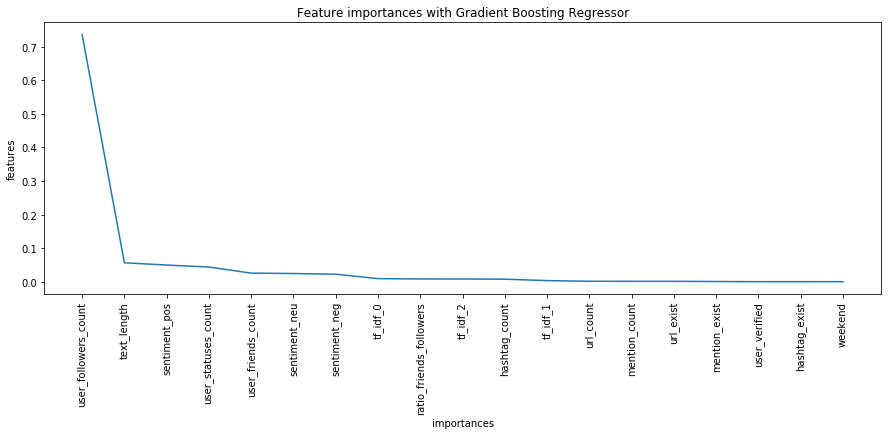

In [13]:
index_sort = np.argsort(reg.feature_importances_)[::-1]
print(index_sort)
plt.figure(figsize=[15,5])
plt.plot(X_train.columns[index_sort], reg.feature_importances_[index_sort])
plt.xticks(rotation='vertical')
plt.xlabel('importances')
plt.ylabel('features')
plt.title("Feature importances with Gradient Boosting Regressor")

In [ ]:
# Now we can train our model. Here we chose a Gradient Boosting Regressor and we set our loss function 
svr =  SVR(kernel="linear")
svr.fit(X_train, y_train)
print(svr.coef_)
y_pred = svr.predict(X_test)
print("Prediction error:", mean_absolute_error(y_true=y_test, y_pred=y_pred))

In [ ]:
coef = svr.coef_.flatten()
index_sort = np.argsort(coef)[::-1]
print(index_sort)
plt.figure(figsize=[15,5])
plt.plot(X_train.columns[index_sort], coef[index_sort])
plt.xticks(rotation='vertical')
plt.xlabel('importances')
plt.ylabel('features')
plt.title("Feature importances with svr")